In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the path to the Excel file


In [3]:
file_path = r"C:\Users\mahma\OneDrive\Documents\GitHub_preperation\ChurnAnalysis_PowerBI\Prediction_Data.xlsx"

# Define the sheet name to read data from


In [4]:
sheet_name = 'vw_ChurnData'


# Read the data from the specified sheet into a pandas DataFrame


In [6]:
data = pd.read_excel(file_path, sheet_name=sheet_name)


# Display the first few rows of the fetched data


In [7]:
print(data.head())


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   12266-HAR  Female   46      No         Haryana                    2   
1   12272-WES    Male   66      No     West Bengal                    9   
2   12281-RAJ    Male   80      No       Rajasthan                   14   
3   12296-MAD    Male   65     Yes  Madhya Pradesh                   14   
4   12303-BIH  Female   56      No           Bihar                    7   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 5        NaN           Yes            Yes  ...   
1                 8        NaN            No             No  ...   
2                25        NaN           Yes            Yes  ...   
3                 2        NaN            No             No  ...   
4                14        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      79.650002   3870.300049           0.0   
1      Cre

# Data Preprocessing

# Drop columns that won't be used for prediction



In [8]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded



In [9]:
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable


In [10]:
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


# Manually encode the target variable 'Customer_Status'


In [11]:
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})


# Split data into features and target


In [12]:
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']


# Split data into training and testing sets


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Random Forest Model

# Initialize the Random Forest Classifier


In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the model


In [15]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluate Model

# Make predictions


In [16]:
y_pred = rf_model.predict(X_test)


# Evaluate the model

In [17]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[814  48]
 [136 204]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       862
           1       0.81      0.60      0.69       340

    accuracy                           0.85      1202
   macro avg       0.83      0.77      0.79      1202
weighted avg       0.84      0.85      0.84      1202



# Feature Selection using Feature Importance

In [18]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


# Plot the feature importances


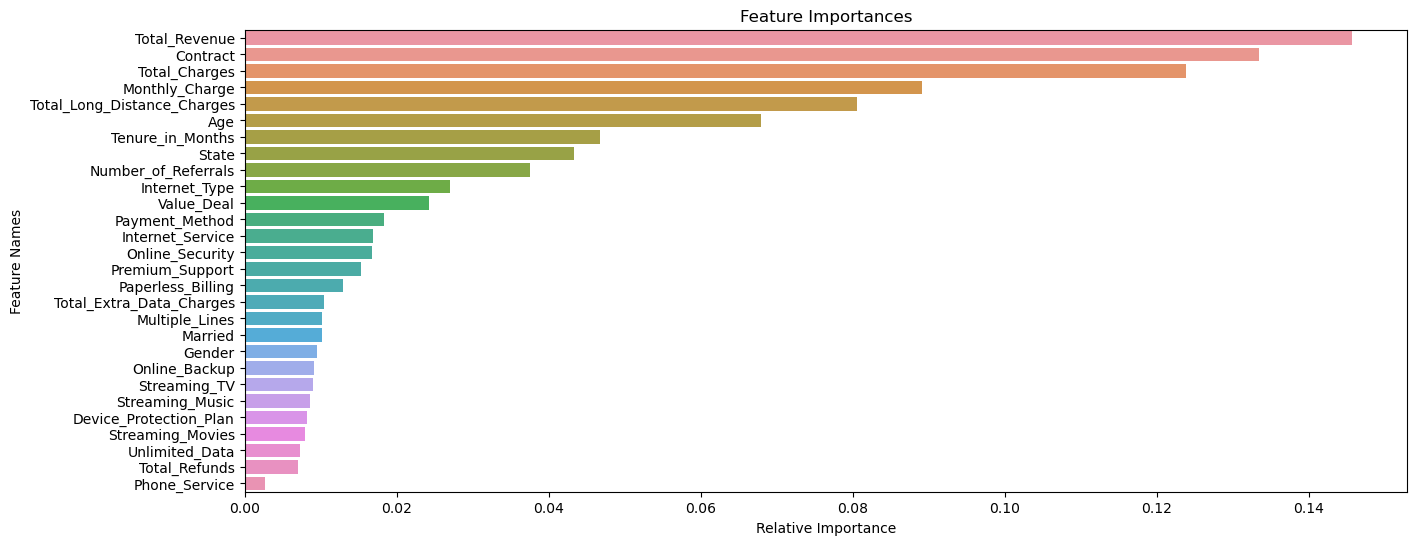

In [19]:
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


# Use Model for Prediction on New Data

In [20]:
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\mahma\OneDrive\Documents\GitHub_preperation\ChurnAnalysis_PowerBI\Prediction_Data.xlsx"

In [21]:
# Define the sheet name to read data from
sheet_name = 'vw_JoinData'


In [22]:
# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)


In [23]:
# Display the first few rows of the fetched data
print(new_data.head())


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   12340-DEL  Female   51     Yes           Delhi                    0   
1   12469-AND    Male   24     Yes  Andhra Pradesh                   11   
2   12490-TEL  Female   52      No       Telangana                    9   
3   18015-ODI  Female   28     Yes          Odisha                   15   
4   18027-UTT  Female   58     Yes   Uttar Pradesh                   15   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                10        NaN           Yes             No  ...   
1                 4        NaN           Yes             No  ...   
2                 6        NaN           Yes             No  ...   
3                 9        NaN           Yes             No  ...   
4                30     Deal 5           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      62.799999     62.799999          0.00   
1      Cre

In [24]:
# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()


In [25]:
# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']


In [26]:
# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)


In [27]:
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])


In [28]:
# Make predictions
new_predictions = rf_model.predict(new_data)


In [29]:
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions


In [30]:
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]


In [31]:
# Save the results
original_data.to_csv(r"C:\Users\mahma\OneDrive\Documents\GitHub_preperation\ChurnAnalysis_PowerBI\Predictions.csv", index=False)